### Ad Hoc Analysis
Analysing the loyalty program of Lola Tamis. 

In [4]:
import pandas as pd

df = pd.read_json('transaction-data-adhoc-analysis.json')
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [5]:
import numpy as np 
import re 

## 1. Prepare the dataset
df.transaction_date = pd.to_datetime(df.transaction_date)
df['month'] = df.transaction_date.dt.month_name().str[:3]
df['day'] = df.transaction_date.dt.day_name()

# item_list = df.transaction_items[1].split(";")
# count_items = np.array([re.findall(r"\(x(\d+)\)", it) for it in item_list]).flatten().tolist()
# name_items = np.array([re.findall(r"(.*),\(x", it) for it in item_list]).flatten().tolist()

df['item_count'] = df.transaction_items.apply(lambda x: np.array([re.findall(r"\(x(\d+)\)", it) for it in x.split(";")]).flatten().tolist())
df['item_names'] = df.transaction_items.apply(lambda x: np.array([re.findall(r"(.*),\(x", it) for it in x.split(";")]).flatten().tolist())
ndf = df.explode(['item_count', 'item_names'])

ndf.item_count = pd.to_numeric(ndf.item_count)
ndf.transaction_value = pd.to_numeric(ndf.transaction_value)
ndf['is_single'] = df.transaction_items.apply(lambda x: True if len(x.split(";"))==1 else False)
ndf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,day,item_count,item_names,is_single
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,Jan,Wednesday,4,"Exotic Extras,Beef Chicharon",True
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,3,"Exotic Extras,Beef Chicharon",False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,4,"HealthyKid 3+,Nutrional Milk",False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,1,"Candy City,Orange Beans",False
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,Jan,Saturday,3,"HealthyKid 3+,Gummy Vitamins",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"HealthyKid 3+,Nutrional Milk",False
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"Candy City,Gummy Worms",False
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,1,"HealthyKid 3+,Nutrional Milk",False
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,3,"Candy City,Gummy Worms",False


In [6]:
## 1.1 Get price per item
pd.options.mode.chained_assignment = None

singles = ndf[(ndf.is_single)]

assert(np.unique(ndf.item_names).tolist() == np.unique(np.array(singles.item_names).flatten().tolist())).all()

singles['item_price'] = singles["transaction_value"].div(singles["item_count"].values)
price_tup = list(set([i for i in zip(singles.item_names, singles.item_price)]))

assert(len(np.unique(ndf.item_names).tolist()) == len(price_tup))

price_dict = dict(price_tup)
price_dict


{'Exotic Extras,Beef Chicharon': 1299.0,
 'HealthyKid 3+,Gummy Vitamins': 1500.0,
 'HealthyKid 3+,Yummy Vegetables': 500.0,
 'Exotic Extras,Kimchi and Seaweed': 799.0,
 'HealthyKid 3+,Nutrional Milk': 1990.0,
 'Candy City,Orange Beans': 199.0,
 'Candy City,Gummy Worms': 150.0}

In [7]:
## 1.2 Match the price
ndf["price_per_item"] = ndf.item_names.apply(lambda x: price_dict[x])
final_df = ndf.reset_index().rename(columns={"index": "transaction_id"})

a = final_df[final_df.transaction_id == 1010]
assert(np.unique(a.transaction_value)[0] == np.sum(a.item_count * a.price_per_item))

final_df

,transaction_id,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,day,item_count,item_names,is_single,price_per_item
0,0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,Jan,Wednesday,4,"Exotic Extras,Beef Chicharon",True,1299.0
1,1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,3,"Exotic Extras,Beef Chicharon",False,1299.0
2,1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,4,"HealthyKid 3+,Nutrional Milk",False,1990.0
3,1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,Jan,Wednesday,1,"Candy City,Orange Beans",False,199.0
4,2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,Jan,Saturday,3,"HealthyKid 3+,Gummy Vitamins",False,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"HealthyKid 3+,Nutrional Milk",False,1990.0
166115,83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,Jun,Thursday,2,"Candy City,Gummy Worms",False,150.0
166116,83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,1,"HealthyKid 3+,Nutrional Milk",False,1990.0
166117,83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...",2639,2022-06-03,Jun,Friday,3,"Candy City,Gummy Worms",False,150.0


In [41]:
## 2. Breakdown of count of each item sold per month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df2 = final_df.groupby(['month','item_names']).agg({'price_per_item': ['count', 'sum']}).reset_index().rename(
        columns={"price_per_item": "Item Sold", "count": "Qty", "sum": "Total","month": "Month", "item_names": "Items" })
df2.Month = pd.Categorical(df2.Month, categories=months)
df2 = df2.sort_values(by='Month').reset_index().drop(columns="index", level=0)
df2

Month                             Items Item Sold           
                                                 Qty      Total
0    Jan    HealthyKid 3+,Yummy Vegetables      3976  1988000.0
1    Jan      HealthyKid 3+,Gummy Vitamins      3860  5790000.0
2    Jan  Exotic Extras,Kimchi and Seaweed      3913  3126487.0
3    Jan      Exotic Extras,Beef Chicharon      3857  5010243.0
4    Jan           Candy City,Orange Beans      3848   765752.0
5    Jan            Candy City,Gummy Worms      3802   570300.0
6    Jan      HealthyKid 3+,Nutrional Milk      3872  7705280.0
7    Feb    HealthyKid 3+,Yummy Vegetables      4072  2036000.0
8    Feb      HealthyKid 3+,Nutrional Milk      3899  7759010.0
9    Feb      HealthyKid 3+,Gummy Vitamins      3990  5985000.0
10   Feb  Exotic Extras,Kimchi and Seaweed      4014  3207186.0
11   Feb           Candy City,Orange Beans      3968   789632.0
12   Feb            Candy City,Gummy Worms      4028   604200.0
13   Feb      Exotic Extras,Beef Chicharon      4004  5201196.0
14   Mar           Candy City,Orange Beans      3908   777692.0
15   Mar      Exotic Extras,Beef Chicharon      3971  5158329.0
16   Mar  Exotic Extras,Kimchi and Seaweed      3989  3187211.0
17   Mar      HealthyKid 3+,Gummy Vitamins      4052  6078000.0
18   Mar      HealthyKid 3+,Nutrional Milk      3962  7884380.0
19   Mar    HealthyKid 3+,Yummy Vegetables      3988  1994000.0
20   Mar            Candy City,Gummy Worms      3980   597000.0
21   Apr            Candy City,Gummy Worms      3999   599850.0
22   Apr      HealthyKid 3+,Gummy Vitamins      3926  5889000.0
23   Apr           Candy City,Orange Beans      3969   789831.0
24   Apr    HealthyKid 3+,Yummy Vegetables      3975  1987500.0
25   Apr      HealthyKid 3+,Nutrional Milk      3952  7864480.0
26   Apr      Exotic Extras,Beef Chicharon      3992  5185608.0
27   Apr  Exotic Extras,Kimchi and Seaweed      3949  3155251.0
28   May      HealthyKid 3+,Gummy Vitamins      3969  5953500.0
29   May  Exotic Extras,Kimchi and Seaweed      3937  3145663.0
30   May      Exotic Extras,Beef Chicharon      3988  5180412.0
31   May           Candy City,Orange Beans      3975   791025.0
32   May            Candy City,Gummy Worms      3922   588300.0
33   May    HealthyKid 3+,Yummy Vegetables      3915  1957500.0
34   May      HealthyKid 3+,Nutrional Milk      3997  7954030.0
35   Jun    HealthyKid 3+,Yummy Vegetables      3906  1953000.0
36   Jun      HealthyKid 3+,Nutrional Milk      3850  7661500.0
37   Jun      HealthyKid 3+,Gummy Vitamins      3997  5995500.0
38   Jun  Exotic Extras,Kimchi and Seaweed      4019  3211181.0
39   Jun      Exotic Extras,Beef Chicharon      3973  5160927.0
40   Jun            Candy City,Gummy Worms      3927   589050.0
41   Jun           Candy City,Orange Beans      4029   801771.0

In [42]:
df2.columns = df2.columns.droplevel(0)
df2

,,,Qty,Total
0,Jan,"HealthyKid 3+,Yummy Vegetables",3976,1988000.0
1,Jan,"HealthyKid 3+,Gummy Vitamins",3860,5790000.0
2,Jan,"Exotic Extras,Kimchi and Seaweed",3913,3126487.0
3,Jan,"Exotic Extras,Beef Chicharon",3857,5010243.0
4,Jan,"Candy City,Orange Beans",3848,765752.0
5,Jan,"Candy City,Gummy Worms",3802,570300.0
6,Jan,"HealthyKid 3+,Nutrional Milk",3872,7705280.0
7,Feb,"HealthyKid 3+,Yummy Vegetables",4072,2036000.0
8,Feb,"HealthyKid 3+,Nutrional Milk",3899,7759010.0
9,Feb,"HealthyKid 3+,Gummy Vitamins",3990,5985000.0


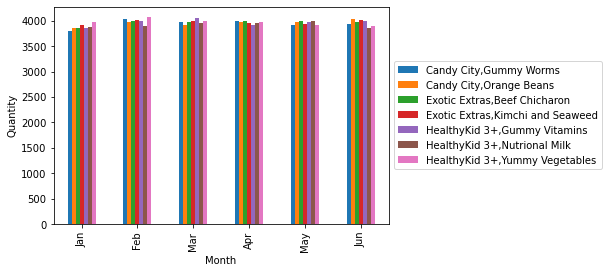

In [52]:
import matplotlib.pyplot as plt

df3 = pd.DataFrame(df2.to_numpy(), columns = ["Month", "Items", "Qty", "Total Sold"])
df3.Month = pd.Categorical(df3.Month, categories=months)
df3 = df3.sort_values(by='Month')
ax = df3[["Month", "Items", "Qty"]].pivot(index='Month', columns='Items', values='Qty').plot(kind='bar')
ax.set_ylabel("Quantity")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



In [79]:
## 3. Define repeaters, inactive, engaged
## Repeaters : 1 if customer of the current month had transaction from the previous month
## Inactive  : 1 if customer of the current month DID not have transaction but had previous transaction last month
## Engaged   : 1 if customer of the current month HAD transaction from the previous months 

trans_month = final_df.month.drop_duplicates().to_list()
trdf = final_df[['transaction_id', 'month', 'day', 'mail', 'username', 'name', 'transaction_value', 'is_single']].drop_duplicates()
trdf

,transaction_id,month,day,mail,username,name,transaction_value,is_single
0,0,Jan,Wednesday,watsonbrenda@gmail.com,veronicawells,Jennifer Campbell,5196,True
1,1,Jan,Wednesday,moorelisa@gmail.com,cgilbert,Melissa Kim,12056,False
4,2,Jan,Saturday,moorelisa@gmail.com,cgilbert,Melissa Kim,5500,False
6,3,Jan,Monday,moorelisa@gmail.com,cgilbert,Melissa Kim,500,True
7,4,Jan,Monday,michael78@yahoo.com,qhernandez,Kristen Cooper,2697,False
...,...,...,...,...,...,...,...,...
166106,83031,Jun,Sunday,christina55@hotmail.com,kmcconnell,Tammy Byrd,3588,False
166108,83032,Jun,Sunday,melvinschmidt@hotmail.com,llowe,Donald Andersen,2095,False
166111,83033,Jun,Wednesday,melvinschmidt@hotmail.com,llowe,Donald Andersen,3396,False
166114,83034,Jun,Thursday,melvinschmidt@hotmail.com,llowe,Donald Andersen,4280,False


In [80]:
## 3. Create table for transaction history
def to_user_transaction_history_df(trdf):
    user_history_dict = dict()
    trdf.month = pd.Categorical(trdf.month, categories=months)
    trans_month = trdf.month.drop_duplicates().to_list()
    for month in trans_month:
        a = trdf[(trdf.month == month)]
        b = a.groupby(['mail'])['transaction_id'].count()
        b = b.to_dict()
        user_history_dict.update({month: b})    
    return pd.DataFrame(user_history_dict)

user_history_df = to_user_transaction_history_df(trdf)
user_history_df

,Jan,Feb,Mar,Apr,May,Jun
aallen@hotmail.com,1.0,2.0,2.0,3.0,3.0,1.0
aaron21@yahoo.com,3.0,1.0,1.0,2.0,2.0,1.0
aaron37@hotmail.com,3.0,NaN,3.0,3.0,NaN,2.0
aaron45@hotmail.com,2.0,4.0,4.0,NaN,3.0,2.0
aaronbrady@hotmail.com,2.0,3.0,1.0,2.0,3.0,NaN
...,...,...,...,...,...,...
wrandall@yahoo.com,NaN,NaN,NaN,NaN,1.0,2.0
xkrause@yahoo.com,NaN,NaN,NaN,NaN,3.0,3.0
brianschmidt@gmail.com,NaN,NaN,NaN,NaN,NaN,3.0
hcharles@yahoo.com,NaN,NaN,NaN,NaN,NaN,3.0


In [94]:
## 3.1 Repeater
## Repeaters : 1 if customer of the current month had transaction from the previous month
rep_curr = user_history_df.copy()
rep_curr = (rep_curr.notnull())*1

rep_prev = rep_curr.copy()
rep_prev['Buffer'] = 0
rep_prev = rep_prev.drop(trans_month[-1], axis=1).reindex(columns=['Buffer']+trans_month[0:-1])

rep = np.multiply(rep_curr.to_numpy(),rep_prev.to_numpy())
rep = pd.DataFrame(rep, columns=trans_month, index=user_history_df.index)
rep = (rep>0)*1
repeaters = rep.sum(axis=0).to_dict()
repeaters

{'Jan': 0, 'Feb': 5275, 'Mar': 5331, 'Apr': 5296, 'May': 5237, 'Jun': 5320}

In [85]:
## 3.2 Inactive
## Inactive : 1 if customer of the current month DID not have transaction but had previous transaction last month
ina_curr = user_history_df.copy()

inactive = dict()
trdf.month = pd.Categorical(trdf.month, categories=months)
trans_month = trdf.month.drop_duplicates().to_list()
for m, month in enumerate(trans_month):
    if m==0:
        inactive.update({month: 0}) 
    else:
        temp = ina_curr.iloc[:,0:m+1]
        a = temp[temp[month].isnull()]
        b = a.sum(axis=1)
        b = b[b>0]
        inactive.update({month: len(b)})  
inactive


0 Jan
1 Feb
2 Mar
3 Apr
4 May
5 Jun


{'Jan': 0, 'Feb': 1525, 'Mar': 1865, 'Apr': 2031, 'May': 2054, 'Jun': 1964}

In [88]:
## 3.3 Engaged
## Engaged   : 1 if customer of the current month HAD transaction from the previous months 
eng_curr = user_history_df.copy()

engaged = dict()
trdf.month = pd.Categorical(trdf.month, categories=months)
trans_month = trdf.month.drop_duplicates().to_list()
for m, month in enumerate(trans_month):
    temp = eng_curr.iloc[:,0:m+1]
    a = temp[~temp[month].isnull()]
    b = a.sum(axis=1)
    b = b[b>0]
    engaged.update({month: len(b)})  

engaged


{'Jan': 6800, 'Feb': 6828, 'Mar': 6844, 'Apr': 6780, 'May': 6778, 'Jun': 6871}

In [96]:
final_dfe = pd.DataFrame({"Repeaters": repeaters,
                        "Inactive": inactive,
                        "Engaged": engaged})
final_dfe = final_dfe.transpose()
final_dfe

,Jan,Feb,Mar,Apr,May,Jun
Repeaters,0,5275,5331,5296,5237,5320
Inactive,0,1525,1865,2031,2054,1964
Engaged,6800,6828,6844,6780,6778,6871
